# Project Overview

## Objective Statement
The objective of this project is to determine some of the features that lead to driver success in F1 racing. Driver success will be defined as whether or not a driver achieves a "podium", or in other words, whether or not they finish a race in 1st, 2nd, or 3rd.

## Data Collection
Data will be collected from the following link: http://ergast.com/mrd/

This is a link to an API with a database that stores historical racing data. For this project, I used data downloaded on 4/5. By the time the project is submitted, there may be new race data added to the site as more races may happen between the download date and the due submission date for the project. This data consists of a total of 13 files, each containing a different set of information such as driver details, lap times, pit stop data, and race results. 

## Data Cleaning
The downloaded data is stored in multiple different tables so most of the data cleaning in the project will involve joining the tables together in a logical way in order to ensure that it contains different, important driver features. Cleaining will also include imputing missing values, as well as reformatting columns.

## Data Visualization
With regards to data visualization, it will be used for a few things. Its first use will be to visualize the relationships between variables in order to determine how the data is related. Additionally, I will visualize the importances of the variables that determine driver success, which compares how significant all the variables are.

# Step 1: Importing the data

Importing the necessary libraries

In [2]:
# libraries for data manipulation and cleaning
import numpy as np
import pandas as pd
import chardet

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# libraries used for better formatting
from IPython.display import Markdown, display


Importing the files

In [3]:
# Sets the path to the folder to a variable
folder = "/Users/natequan/Desktop/Spring2023/STAT4185/FinalProject/form1data/"

# Used to read the type of encryption in the files
with open(f"{folder}/circuits.csv", 'rb') as f:
    result = chardet.detect(f.read())

# A list of all the file names
files = [
    'circuits.csv',
    'constructor_results.csv',
    'constructors.csv', 
    'constructor_standings.csv',
    'drivers.csv',
    'driver_standings.csv',
    'lap_times.csv',
    'pit_stops.csv',
    'qualifying.csv',
    'races.csv',
    'results.csv',
    'status.csv'
    ]

# Creates a dictionary so that the tables will correspond to a name
df_dict = {}

# Adds to the dictionary:
#    dataset name: dataset
for file in files:
    path = f"{folder}{file}"
    split_file = file.split(".")
    df_name = split_file[0]
    df_dict[df_name] = pd.read_csv(path, encoding = result['encoding'])

# Prints the dataset name and its shape
for key in df_dict.keys():
    print(f"{key} = {df_dict[key].shape}")

circuits = (77, 9)
constructor_results = (12200, 5)
constructors = (211, 5)
constructor_standings = (12961, 7)
drivers = (857, 9)
driver_standings = (33942, 7)
lap_times = (541113, 6)
pit_stops = (9773, 7)
qualifying = (9635, 9)
races = (1102, 18)
results = (25900, 18)
status = (139, 2)


# Step 2: Cleaning and Manipulating the Data

Shows info on all 13 datasets

In [4]:
for key in df_dict.keys():
    display(Markdown(f'**<u>{key}</u>**'))
    print(df_dict[key].info())

**<u>circuits</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB
None


**<u>constructor_results</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12200 non-null  int64  
 1   raceId                12200 non-null  int64  
 2   constructorId         12200 non-null  int64  
 3   points                12200 non-null  float64
 4   status                12200 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 476.7+ KB
None


**<u>constructors</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB
None


**<u>constructor_standings</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12961 non-null  int64  
 1   raceId                  12961 non-null  int64  
 2   constructorId           12961 non-null  int64  
 3   points                  12961 non-null  float64
 4   position                12961 non-null  int64  
 5   positionText            12961 non-null  object 
 6   wins                    12961 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 708.9+ KB
None


**<u>drivers</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB
None


**<u>driver_standings</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33942 entries, 0 to 33941
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33942 non-null  int64  
 1   raceId             33942 non-null  int64  
 2   driverId           33942 non-null  int64  
 3   points             33942 non-null  float64
 4   position           33942 non-null  int64  
 5   positionText       33942 non-null  object 
 6   wins               33942 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB
None


**<u>lap_times</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541113 entries, 0 to 541112
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        541113 non-null  int64 
 1   driverId      541113 non-null  int64 
 2   lap           541113 non-null  int64 
 3   position      541113 non-null  int64 
 4   time          541113 non-null  object
 5   milliseconds  541113 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.8+ MB
None


**<u>pit_stops</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9773 non-null   int64 
 1   driverId      9773 non-null   int64 
 2   stop          9773 non-null   int64 
 3   lap           9773 non-null   int64 
 4   time          9773 non-null   object
 5   duration      9773 non-null   object
 6   milliseconds  9773 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 534.6+ KB
None


**<u>qualifying</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9635 entries, 0 to 9634
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9635 non-null   int64 
 1   raceId         9635 non-null   int64 
 2   driverId       9635 non-null   int64 
 3   constructorId  9635 non-null   int64 
 4   number         9635 non-null   int64 
 5   position       9635 non-null   int64 
 6   q1             9627 non-null   object
 7   q2             9475 non-null   object
 8   q3             9317 non-null   object
dtypes: int64(6), object(3)
memory usage: 677.6+ KB
None


**<u>races</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB
None


**<u>results</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25900 non-null  int64  
 1   raceId           25900 non-null  int64  
 2   driverId         25900 non-null  int64  
 3   constructorId    25900 non-null  int64  
 4   number           25900 non-null  object 
 5   grid             25900 non-null  int64  
 6   position         25900 non-null  object 
 7   positionText     25900 non-null  object 
 8   positionOrder    25900 non-null  int64  
 9   points           25900 non-null  float64
 10  laps             25900 non-null  int64  
 11  time             25900 non-null  object 
 12  milliseconds     25900 non-null  object 
 13  fastestLap       25900 non-null  object 
 14  rank             25900 non-null  object 
 15  fastestLapTime   25900 non-null  object 
 16  fastestLapSpeed  25900 non-null  object 
 17  statusId    

**<u>status</u>**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None


Null values in this dataset are listed as '\N', so we need to replace this with NaN values

In [5]:
for key in df_dict.keys():
    df_dict[key] = df_dict[key].replace('\\N', np.nan)

Converting the positionOrder variable to a float type

In [6]:
df_dict['results']['positionOrder'].astype('float64')

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
25895    16.0
25896    17.0
25897    18.0
25898    19.0
25899    20.0
Name: positionOrder, Length: 25900, dtype: float64

Converting the "milliseconds" field in the lap_times df into seconds in order to get the lap time into an easier to interpret numerical field.

In [7]:
df_dict['lap_times']['milliseconds'] = df_dict['lap_times']['milliseconds']/1000
df_dict['lap_times'].rename(columns = {'milliseconds': 'lap_time(seconds)'}, inplace = True)

Getting the slowest, average, and fastest lap time per racer per each race.

In [8]:
lap_vals = df_dict['lap_times'].groupby(['raceId', 'driverId']).agg({'lap_time(seconds)':['min', 'max', 'mean']}).reset_index()
lap_vals.columns = lap_vals.columns.map('_'.join)

lap_vals.rename(columns = {'raceId_': 'raceId', 'driverId_':'driverId', 'lap_time(seconds)_min':'fastest_lap',
                            'lap_time(seconds)_max':'slowest_lap', 'lap_time(seconds)_mean':'average_lap'}, inplace = True)

lap_vals.head()

,raceId,driverId,fastest_lap,slowest_lap,average_lap
0,1,1,89.020,153.309,97.563759
1,1,2,88.283,157.754,97.635672
2,1,3,87.706,155.699,97.612172
3,1,4,88.712,153.045,97.597638
4,1,6,89.923,104.899,91.822235


Cleaning the qualifying table: converting the q1, q2, and q3 times into a numerical seconds field.

In [9]:
def time_to_sec(time_str):
    time_str = str(time_str)
    time_list = time_str.split(':')
    if len(time_list) != 2:
        return np.nan
    else:
        min = time_list[0]
        sec = time_list[1]
    total_sec = int(min) *60 + float(sec)
    return total_sec
    

In [10]:
df_dict['qualifying']['q1'] = df_dict['qualifying']['q1'].apply(time_to_sec)
df_dict['qualifying']['q2'] = df_dict['qualifying']['q2'].apply(time_to_sec)
df_dict['qualifying']['q3'] = df_dict['qualifying']['q3'].apply(time_to_sec)


Converting the milliseconds field of the pitstops table to seconds to make it easier to interpret and to maintain consistency

In [11]:
df_dict['pit_stops']['milliseconds'] = df_dict['pit_stops']['milliseconds'] / 1000
df_dict['pit_stops'].rename(columns = {'milliseconds':'pit_stop_seconds'}, inplace = True)


Creating a new pitstop df that counts the amount of pitstops per race, and total pitstop time in a race

In [12]:
ps = df_dict['pit_stops'].groupby(['raceId', 'driverId']).agg({'stop':'max', 'pit_stop_seconds':'sum'}).reset_index()

ps.rename(columns = {'stop':'#_of_pit_stops','pit_stop_seconds':'total_time_in_pit'}, inplace = True)

ps.head()

,raceId,driverId,#_of_pit_stops,total_time_in_pit
0,841,1,2,46.426
1,841,2,2,48.092
2,841,3,1,23.716
3,841,4,3,72.165
4,841,5,1,24.865


Cleaning the results table. Converting milliseconds to seconds again, converting fastestLapSpeed to float

In [13]:
df_dict['results']['milliseconds']= pd.to_numeric(df_dict['results']['milliseconds'])
df_dict['results']['milliseconds'] = df_dict['results']['milliseconds'] / 1000
df_dict['results'].rename(columns = {'milliseconds':'whole_race_time(sec)'}, inplace = True)

df_dict['results']['fastestLapSpeed'] = pd.to_numeric(df_dict['results']['fastestLapSpeed'])
df_dict['results']['rank'] = pd.to_numeric(df_dict['results']['rank'])
df_dict['results']['position'] = pd.to_numeric(df_dict['results']['position'])


df_dict['results'].rename(columns = {'positionOrder': 'final_race_position', 'fastestLap':'fastest_lap#', 'fastestLapSpeed': 'fastest_lap_speed(km/h)',
                                     'rank':'fastest_lap_rank'}, inplace = True)

df_dict['results'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 25900 non-null  int64  
 1   raceId                   25900 non-null  int64  
 2   driverId                 25900 non-null  int64  
 3   constructorId            25900 non-null  int64  
 4   number                   25894 non-null  object 
 5   grid                     25900 non-null  int64  
 6   position                 15041 non-null  float64
 7   positionText             25900 non-null  object 
 8   final_race_position      25900 non-null  int64  
 9   points                   25900 non-null  float64
 10  laps                     25900 non-null  int64  
 11  time                     7128 non-null   object 
 12  whole_race_time(sec)     7127 non-null   float64
 13  fastest_lap#             7438 non-null   object 
 14  fastest_lap_rank      

Creates a dataframe that will be used to store driver data and results. Merges the drivers and drvier_standings tables to get the standings of the drivers after each race. It also gives details about accumulated placement points and how many wins so far throughout the season. 

In [14]:
dr = pd.merge(df_dict['drivers'], df_dict['driver_standings'], on = 'driverId')
dr.drop(columns = ['forename', 'surname', 'number', 'code', 'dob', 'nationality', 'url', 'driverStandingsId', 'positionText'], inplace = True)
dr.rename(columns = {'points': 'season_points', 'position': 'season_position', 'wins': 'season_wins'}, inplace = True)
dr.head(25)

,driverId,driverRef,raceId,season_points,season_position,season_wins
0,1,hamilton,18,10.0,1,1
1,1,hamilton,19,14.0,1,1
2,1,hamilton,20,14.0,3,1
3,1,hamilton,21,20.0,2,1
4,1,hamilton,22,28.0,3,1
5,1,hamilton,23,38.0,1,2
6,1,hamilton,24,38.0,2,2
7,1,hamilton,25,38.0,4,2
8,1,hamilton,26,48.0,1,3
9,1,hamilton,27,58.0,1,4


Merges the main, dr dataframe with the races dataframe in order to add more information about the races, such as time and year

In [15]:
dr = pd.merge(dr, df_dict['races'], on = 'raceId')
dr.head()

,driverId,driverRef,raceId,season_points,season_position,season_wins,year,round,circuitId,name,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,hamilton,18,10.0,1,1,2008,1,1,Australian Grand Prix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,heidfeld,18,8.0,2,0,2008,1,1,Australian Grand Prix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,rosberg,18,6.0,3,0,2008,1,1,Australian Grand Prix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,alonso,18,5.0,4,0,2008,1,1,Australian Grand Prix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,kovalainen,18,4.0,5,0,2008,1,1,Australian Grand Prix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the unnecessary columns that were added as part of the races table. Date and time fields are not very important in determining if a driver will podium.

In [16]:
dr.drop(columns = ['year', 'round', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], inplace = True)

#dr['date'] = pd.to_datetime(dr['date'])
#dr['race_year'] = dr['date'].dt.year
#dr['race_month'] = dr['date'].dt.month
#dr['race_day'] = dr['date'].dt.day

#dr['time'] = pd.to_datetime(dr['time'])
#dr['race_hour'] = dr['time'].dt.hour
#dr['race_min'] = dr['time'].dt.minute

dr.drop(columns = ['date', 'time'], inplace = True)
dr.rename(columns = {'name': 'race_name'}, inplace = True)

dr.head()

,driverId,driverRef,raceId,season_points,season_position,season_wins,circuitId,race_name
0,1,hamilton,18,10.0,1,1,1,Australian Grand Prix
1,2,heidfeld,18,8.0,2,0,1,Australian Grand Prix
2,3,rosberg,18,6.0,3,0,1,Australian Grand Prix
3,4,alonso,18,5.0,4,0,1,Australian Grand Prix
4,5,kovalainen,18,4.0,5,0,1,Australian Grand Prix


Merging the main, dr dataframe with the lap_vals dataframe in order to add lap time data for each race.

In [17]:
dr = pd.merge(dr, lap_vals, on = ['driverId', 'raceId'])
dr.head()

,driverId,driverRef,raceId,season_points,season_position,season_wins,circuitId,race_name,fastest_lap,slowest_lap,average_lap
0,1,hamilton,18,10.0,1,1,1,Australian Grand Prix,87.452,166.432,98.114069
1,2,heidfeld,18,8.0,2,0,1,Australian Grand Prix,87.739,166.678,98.208517
2,3,rosberg,18,6.0,3,0,1,Australian Grand Prix,88.090,156.683,98.254810
3,4,alonso,18,5.0,4,0,1,Australian Grand Prix,88.603,170.306,98.410293
4,5,kovalainen,18,4.0,5,0,1,Australian Grand Prix,87.418,175.160,98.424655


Merging the dr dataframe with the qualifying dataframe in order to add each driver's qualifying data for each race.

In [18]:
dr = pd.merge(dr, df_dict['qualifying'], on = ['raceId', 'driverId'])
dr.head()

,driverId,driverRef,raceId,season_points,season_position,season_wins,circuitId,race_name,fastest_lap,slowest_lap,average_lap,qualifyId,constructorId,number,position,q1,q2,q3
0,1,hamilton,18,10.0,1,1,1,Australian Grand Prix,87.452,166.432,98.114069,1,1,22,1,86.572,85.187,86.714
1,2,heidfeld,18,8.0,2,0,1,Australian Grand Prix,87.739,166.678,98.208517,5,2,3,5,85.960,85.518,87.236
2,3,rosberg,18,6.0,3,0,1,Australian Grand Prix,88.090,156.683,98.254810,7,3,7,7,86.295,86.059,88.687
3,4,alonso,18,5.0,4,0,1,Australian Grand Prix,88.603,170.306,98.410293,12,4,5,12,86.907,86.188,NaN
4,5,kovalainen,18,4.0,5,0,1,Australian Grand Prix,87.418,175.160,98.424655,3,1,23,3,85.664,85.452,87.079


Editing the new dataframe by dropping unnecessary columns and renaming certain columns to make them more comprehensible. 

In [19]:
dr.drop(columns = ['qualifyId', 'number'], inplace = True)
dr.rename(columns = {'position': 'qual_position', 'q1': 'q1_time', 'q2': 'q2_time', 'q3': 'q3_time'}, inplace = True)
dr.columns

Index(['driverId', 'driverRef', 'raceId', 'season_points', 'season_position',
       'season_wins', 'circuitId', 'race_name', 'fastest_lap', 'slowest_lap',
       'average_lap', 'constructorId', 'qual_position', 'q1_time', 'q2_time',
       'q3_time'],
      dtype='object')

Merging the dr dataframe with the constructors dataframe in order to get the "team" that each drvier is associated with. From here, I once again dropped unnecessary columns and renamed a column to make it more clear. 

In [20]:
dr = pd.merge(dr, df_dict['constructors'], on = 'constructorId')
dr.drop(columns = ['url', 'nationality', 'constructorRef'], inplace = True)
dr.rename(columns = {'name':'constructor_name'}, inplace = True)
dr.head()

,driverId,driverRef,raceId,season_points,season_position,season_wins,circuitId,race_name,fastest_lap,slowest_lap,average_lap,constructorId,qual_position,q1_time,q2_time,q3_time,constructor_name
0,1,hamilton,18,10.0,1,1,1,Australian Grand Prix,87.452,166.432,98.114069,1,1,86.572,85.187,86.714,McLaren
1,5,kovalainen,18,4.0,5,0,1,Australian Grand Prix,87.418,175.160,98.424655,1,3,85.664,85.452,87.079,McLaren
2,1,hamilton,19,14.0,1,1,2,Malaysian Grand Prix,95.462,135.491,98.662554,1,4,95.392,94.627,96.709,McLaren
3,5,kovalainen,19,10.0,4,0,2,Malaysian Grand Prix,95.922,125.997,98.517946,1,3,95.227,94.759,96.613,McLaren
4,1,hamilton,20,14.0,3,1,3,Bahrain Grand Prix,95.520,129.676,97.906857,1,3,92.750,91.922,93.292,McLaren


Merging the dr dataframe with a ps dataframe, which was created earlier and contains some pit stop data, such as the number of stops and the amount of time spent in the pit stop per each race for a driver. 

In [21]:
dr = pd.merge(dr, ps, on = ['driverId', 'raceId'])
dr.head()

,driverId,driverRef,raceId,season_points,season_position,season_wins,circuitId,race_name,fastest_lap,slowest_lap,average_lap,constructorId,qual_position,q1_time,q2_time,q3_time,constructor_name,#_of_pit_stops,total_time_in_pit
0,4,alonso,969,0.0,14,0,1,Australian Grand Prix,90.077,109.469,91.728380,1,13,85.872,85.425,NaN,McLaren,1,22.484
1,838,vandoorne,969,0.0,13,0,1,Australian Grand Prix,89.440,128.894,92.705582,1,18,86.858,NaN,NaN,McLaren,1,39.562
2,1,hamilton,842,22.0,3,0,2,Malaysian Grand Prix,101.512,124.636,105.531946,1,2,96.861,95.852,94.974,McLaren,4,93.011
3,18,button,842,26.0,2,0,2,Malaysian Grand Prix,101.264,123.347,104.698089,1,4,97.033,95.569,95.200,McLaren,3,67.354
4,1,hamilton,841,18.0,2,0,1,Australian Grand Prix,90.314,113.298,92.975103,1,2,85.384,84.595,84.307,McLaren,2,46.426


Merging the dr dataframe and the results dataframe to get necessary data about the final results of the race for each driver. Also dropped unnecessary columns once again. 

In [22]:
dr = pd.merge(dr, df_dict['results'], on = ['driverId', 'raceId'])
dr.drop(columns = ['constructorId_y', 'number', 'grid', 'positionText', 'position', 'points',
                   'laps', 'time', 'fastestLapTime'], inplace = True)
dr.columns

Index(['driverId', 'driverRef', 'raceId', 'season_points', 'season_position',
       'season_wins', 'circuitId', 'race_name', 'fastest_lap', 'slowest_lap',
       'average_lap', 'constructorId_x', 'qual_position', 'q1_time', 'q2_time',
       'q3_time', 'constructor_name', '#_of_pit_stops', 'total_time_in_pit',
       'resultId', 'final_race_position', 'whole_race_time(sec)',
       'fastest_lap#', 'fastest_lap_rank', 'fastest_lap_speed(km/h)',
       'statusId'],
      dtype='object')

Renaming a column and converting an object column into a numeric column

In [23]:
dr.rename(columns = {'constructorId_x': 'constructorId'}, inplace = True)
dr['fastest_lap#'] = pd.to_numeric(dr['fastest_lap#'])

Since I am going to use a decision tree, I need to get rid of all object columns: 
* Drivers will be identified based on their ID
* Race Name will be identified based on the circuit_id
* Constructors will be identified based on their ID
    

In [24]:
dr.drop(columns = ['resultId', 'driverRef', 'race_name', 'constructor_name'], inplace = True)

The sci-kit learn decision tree model I want to use does not support NaN values, so I will have to impute values for the following columns:
* q1_time
* q2_time
* q3_time
* whole_race_time(sec)
* fastest_lap#
* fastest_lap_speed(km/h)


To impute q1_time, I will group the race by race_id and assign each driver the maximum q1_time in that session. I'm assuming that if drivers do not have a q1_time, they did not put up a valid lap for q1, so they deserve to have the worst time. We will also penalize them by adding 1 second to the maximum time.

This will also go for q2 and q3. For these, there are more NaN values because drivers must be in the top part of their previous section to qualify for q2 and q3. As a result, we will also fill in their times with the maximum time for each of these sessions plus a 1 second penalty for either not making it, or not putting up a lap.

In [25]:
def impute_max(temp, actual, col):
    for race_id, times in temp:
        max_time = times[col].max()
        actual[col] = actual[col].fillna(max_time + 1)

race_id_group = dr.groupby('raceId')

impute_max(race_id_group, dr, 'q1_time')
impute_max(race_id_group, dr, 'q2_time')
impute_max(race_id_group, dr, 'q3_time')



To account for the missing values in the whole_race_time(sec) column, I will drop the column due to the fact there are too many missing values. In the case of this columns, almost 50% of the values are missing, which could be due to a multitude of drivers being unable to finish races. Imputing this data would have a negative effect on this variable since I will be generating almost half of the data, which would not give good results

In [26]:
dr.drop(columns = 'whole_race_time(sec)', inplace = True)

fastest_lap# will actually be dropped because it is not a necessary variable.

In [27]:
dr.drop(columns = 'fastest_lap#', inplace = True)

fastest_lap_speed will be imputed in a similar way as q1, q2, and q3 times. However, rather than the maximum value for lap speed, we will just take average of the fastest lap speeds for a given race.

In [28]:
lap_speed = dr.groupby('raceId')

for race_id, speed in lap_speed:
    avg_speed = speed['fastest_lap_speed(km/h)'].mean()
    dr['fastest_lap_speed(km/h)'] = dr['fastest_lap_speed(km/h)'].fillna(avg_speed)

Dropping the raceId column since it is no longer needed

In [29]:
dr.drop(columns = 'raceId', inplace = True)

Creating a podium column to classify whether or not a driver gets a podium in the race (places 1st, 2nd, or 3rd)

In [30]:
def podium(position):
    if position in [1, 2, 3]:
        return 1
    else:
        return 0

dr['podium'] = dr['final_race_position'].apply(podium)

A final check on the columns of the table

In [31]:
dr.columns

Index(['driverId', 'season_points', 'season_position', 'season_wins',
       'circuitId', 'fastest_lap', 'slowest_lap', 'average_lap',
       'constructorId', 'qual_position', 'q1_time', 'q2_time', 'q3_time',
       '#_of_pit_stops', 'total_time_in_pit', 'final_race_position',
       'fastest_lap_rank', 'fastest_lap_speed(km/h)', 'statusId', 'podium'],
      dtype='object')

A plot of the correlations between the variables in order to get a better understanding of the data. To get there corelations, I will have to make a new dataframe that does not contain the categorical variables. 

<AxesSubplot:title={'center':'Correlations between continuous variables'}>

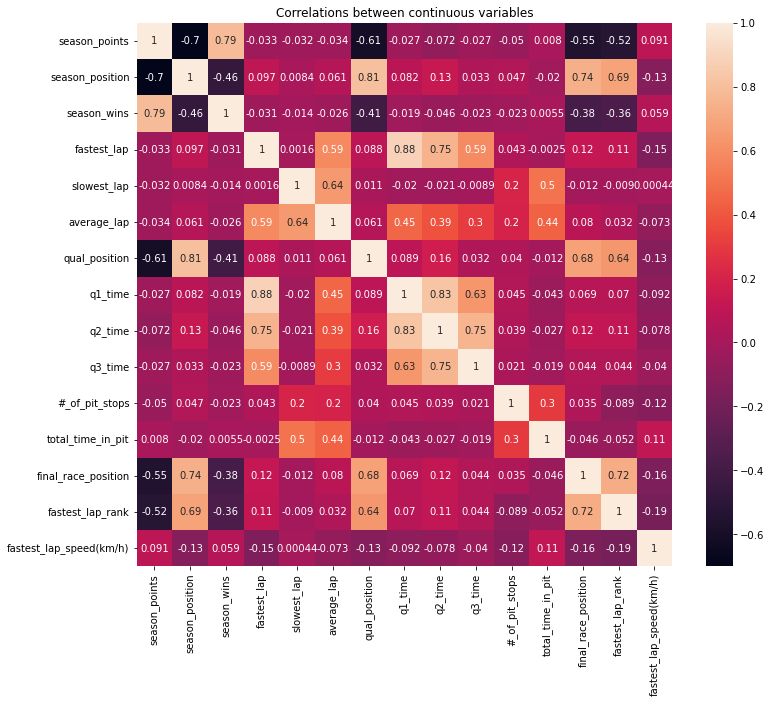

In [41]:
cont_df = dr.drop(columns = ['driverId', 'circuitId', 'constructorId', 'statusId', 'podium'])

corr_df = cont_df.corr()

plt.figure(figsize= (12, 10))
plt.title("Correlations between continuous variables")
sns.heatmap(corr_df, annot = True)

# Step 3: Implementing a Machine Learning Model

For this part of the project, I will be using a decision tree in order to identify important features of the most successful drivers. The idea of "successful drivers" will be based on whether or not they are able to earn a podium for the race. I am choosing to use a classifier model rather than a regressor model because the table consists of categorical variables (such as ID fields and podiums is also a binary variable) and continuous variables. 

This sets X to all columns besides the final race position and podium because we are trying to identify the features in X that lead to being successful. We won't use final race position in the model because it was directly used to compute the podium field. 

In [33]:
X = dr.drop(columns = ['final_race_position', 'podium'])

This sets y equal to podium because that is the metric that we are using to determine how "successful" drivers are.

In [34]:
y = dr['podium']


Splitting the data into test and training data sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 42)


Make the decision tree model

In [36]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)

Score the decision tree model

In [37]:
accuracy = tree.score(X_test, y_test)
accuracy

0.8986629134412386

Sorting and printing out the features and their importance

In [38]:
importances = tree.feature_importances_

feature_list = []

for ind, feature in enumerate(X.columns):
    feature_list.append(feature)

sorted_index = importances.argsort()

sorted_importances = []
sorted_features = []

for i in sorted_index:
    sorted_importances.append(importances[i])
    sorted_features.append(feature_list[i])

for i in range(len(sorted_features)):
    print(f'{sorted_features[i]} importance: {sorted_importances[i]}')

season_wins importance: 0.010190282678710671
#_of_pit_stops importance: 0.010796490331374057
circuitId importance: 0.010811590392314902
constructorId importance: 0.014967745493295779
q1_time importance: 0.018338099977580916
q3_time importance: 0.021185453668838724
fastest_lap importance: 0.023320745102844723
driverId importance: 0.023729128184251814
average_lap importance: 0.026415856176405936
q2_time importance: 0.02816098875688046
slowest_lap importance: 0.03281717416033732
fastest_lap_speed(km/h) importance: 0.0341697208675136
statusId importance: 0.04404251328012257
total_time_in_pit importance: 0.04489291402788409
fastest_lap_rank importance: 0.04517039479130184
season_points importance: 0.06035903547324931
qual_position importance: 0.11470866924710822
season_position importance: 0.4359231973899852


Plotting the features and their importances

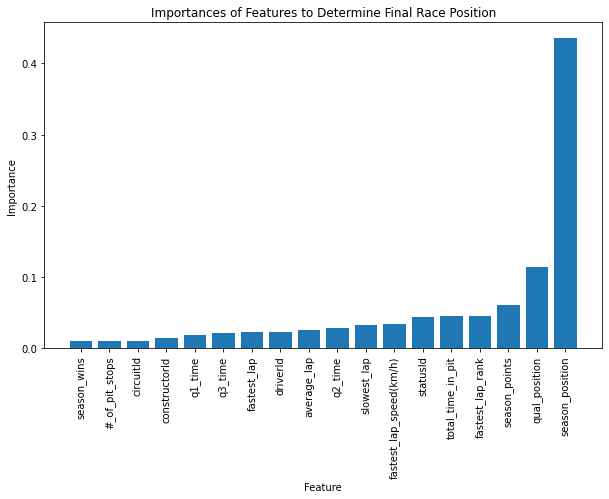

In [39]:
plt.figure(figsize = (10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Importances of Features to Determine Final Race Position")
plt.xticks(rotation = 90)
plt.show()

# Step 4: Analysis and Conclusion


Looking at the machine learning model, there are a variety of takeaways. The most important of which are the importance of certain features in determining whether or not a driver will achieve a podium. Looking at the importances and the bar chart, it can be seen that season_position is the single most important variable in determining a whether or not a driver achieves a podium for any given race. Reflecting on why this may be the case, it definitely does make sense because of the fact that season_position is a way to determine how successful a driver and their team is in the season up to the point of the race. This metric captures a variety of details behind the scenes, such as how good the driver actually is, how fast the car is relative to others, and how effective team decisions have been. Obvioiusly, if the driver is good, the car is fast, and the team is making good decisions, it is likely that they will have a high season_position and be able to achieve a podium for most races. Especially in the past in Formula 1, before there was a cost cap, there would be a clear distinction between factors such as car speed and team personel among different teams, as some teams were able to spend millions of more dollars on their cars and teams since they were able to afford it. 

The only other distinctly important feature, which is the second most important feature in determining a driver podium, is their position in qualifying. This shows that how well drivers do in the qualifying session leading up to the race can have a large impact on how they perform in the acutal race. As a result, it can be seen that these qualifying sessions are really important, which makes sense intuitively. If a driver does well during these sessions, they are likely to start at the front of the race and thus, are more likely to earn a top 3 placement. The importance of qualifying shows that drivers cannot only rely on their skills during the race, but most also perform well during qualifying sessions in order to better set themselves up for success. To do so, teams must support the driver to ensure that the car is finely tuned for the qualifying sessions and proper adjustments are made so that the driver can be best set up for the qualifying sessions. 

Beyond these two factors, there were not any other factors that seemed significantly more important than the other, which was a bit surprising. The lack importance in features such as fastest_lap, average_lap, and fastest_lap_speed were all relatively surprising. Intuitively, it would make sense that having the fastest average lap time would correspond to a higher placement, but that is not the case with the model, which is rather surprising. Similarly, a higher fastest_lap_speed would indicate that the car would be the fastest for the race, but it also was not important in determining podium finishes for drivers. Both of these things further emphasize the importance of the qualifying position because fast average lap times and high speeds are both factors that should intuitively lead to a higher podium, yet even these two things are not able to overcome starting position, as determined by the qualifying_position. 

Lastly, it is important to consider that the model has a high accuracy at about 90%, meaning that the model does a very good job in classifying those that get a podium finish for a given race, and those that do not. This high accuracy gives the importances of these features more value because it shows that the model is actually making correct predictions. If the model was less successful, with a lower accuracy rate, the importance of the features would be less valuable because the predictions would be less reliable. As a result, the model's high accuracy rate not only reinforces the significance of the identified features, but it also indicates their potential usefulness in predicting future podium finishes in similar races. 